### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
#宣告
import cv2
import matplotlib.patches as patches
import IPython.display as display
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import Sequential 
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

import tensorflow as tf

Using TensorFlow backend.


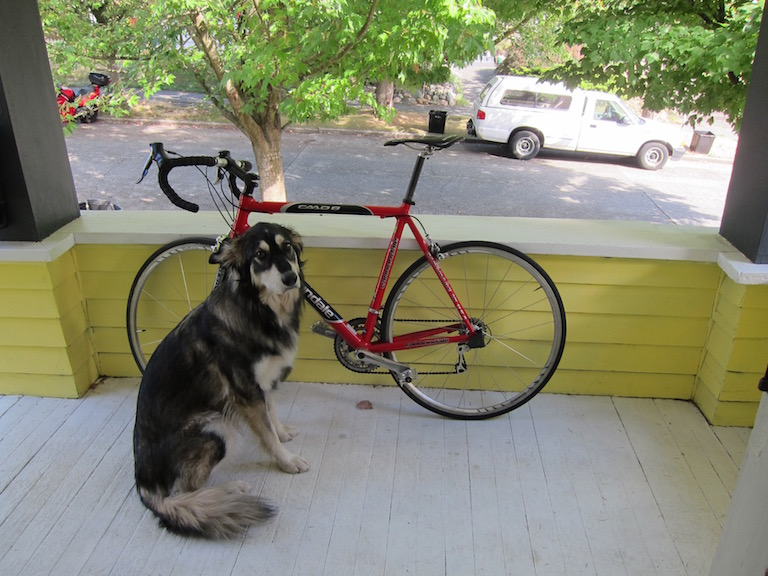

In [2]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
# !wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
image=cv2.imread('images/dog.jpg')
#ax.imshow(image)

def imshow(a, fmt='png'):
    if len(a.shape) == 3:
        a = a[:, :, ::-1]
    a = np.uint8(np.clip(a, 0, 255))
    c = BytesIO()
    Image.fromarray(a).save(c, fmt)
    display.display(display.Image(data=c.getvalue()))
    
imshow(image)

In [3]:
def reset_graph(seed=38852):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 576, 768, 3)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None
(1, 576, 768, 3)

(576, 768, 3)


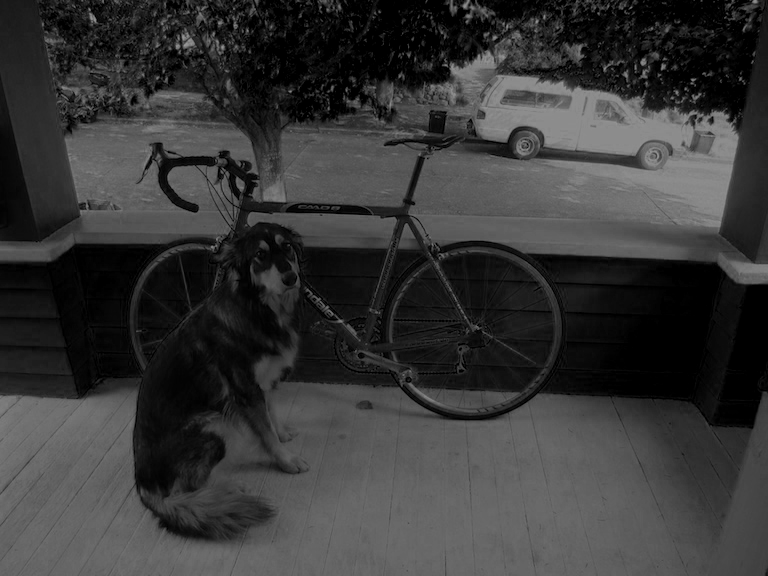

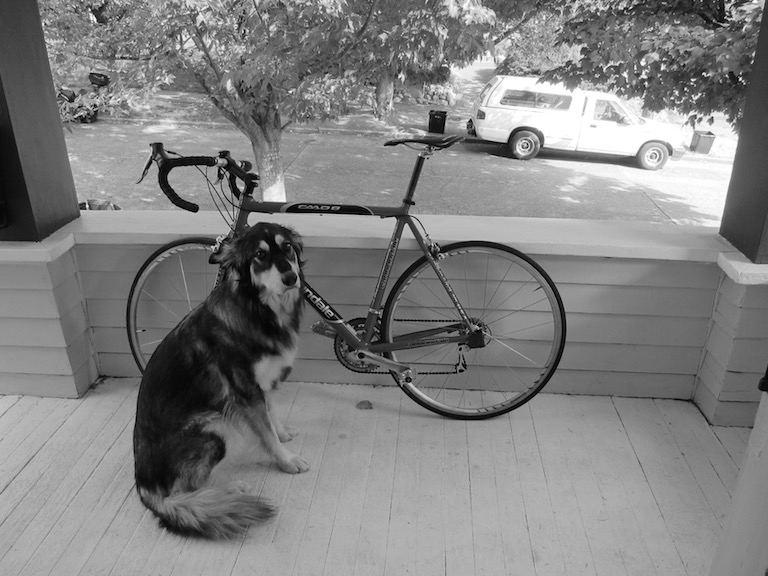

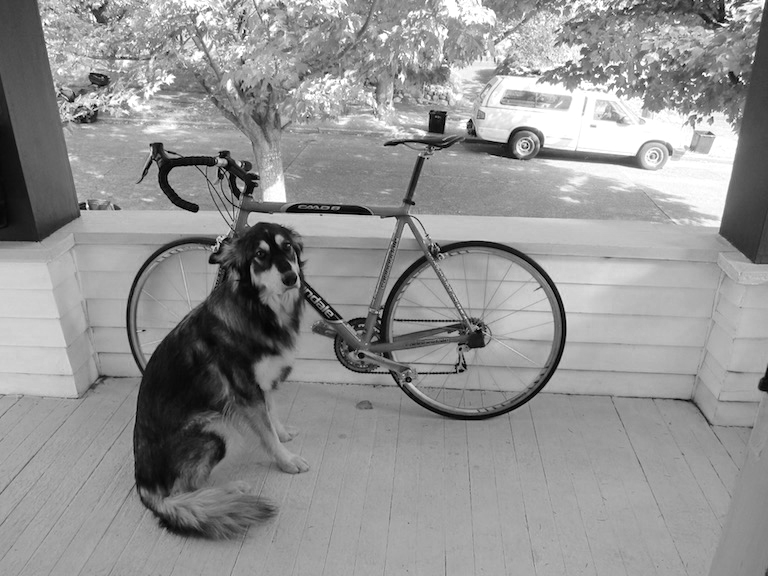

In [4]:
reset_graph()
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

print(model.summary())
#權重都是亂數值

# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0)
print(img.shape)
imshow(img[...,0])
imshow(img[...,1])
imshow(img[...,2])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
None
(1, 576, 768, 3)
(576, 768, 4)


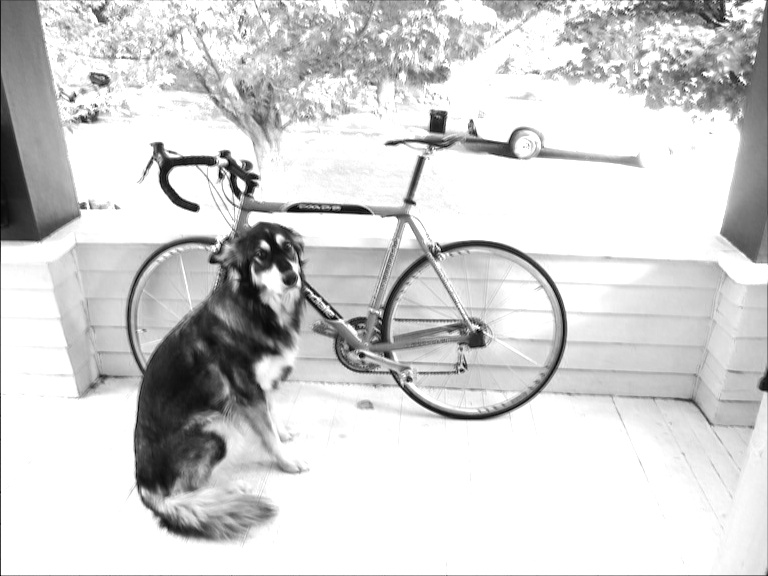

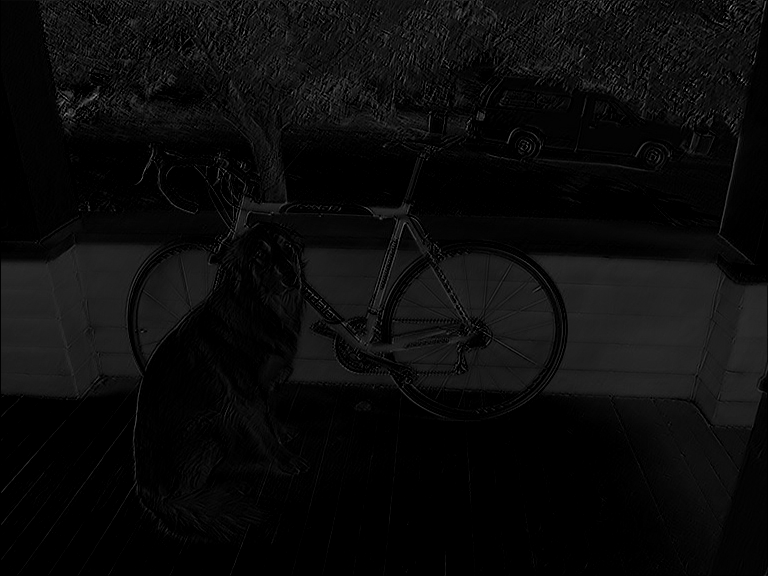

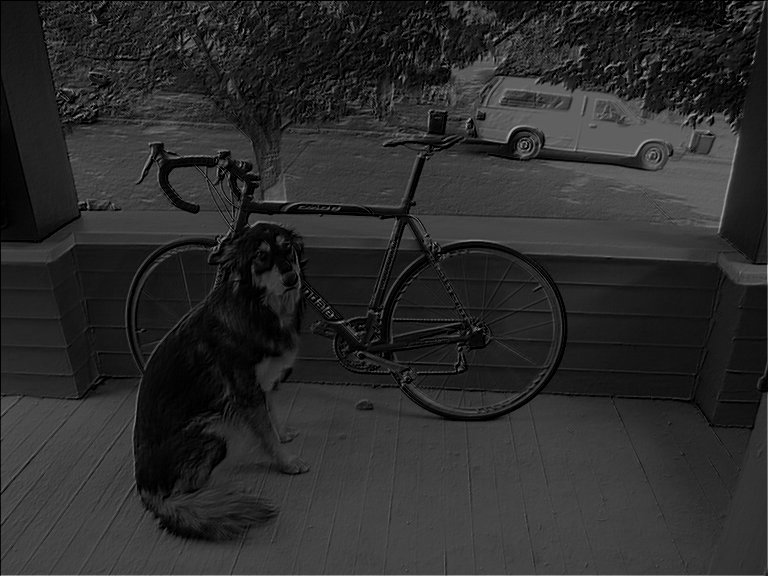

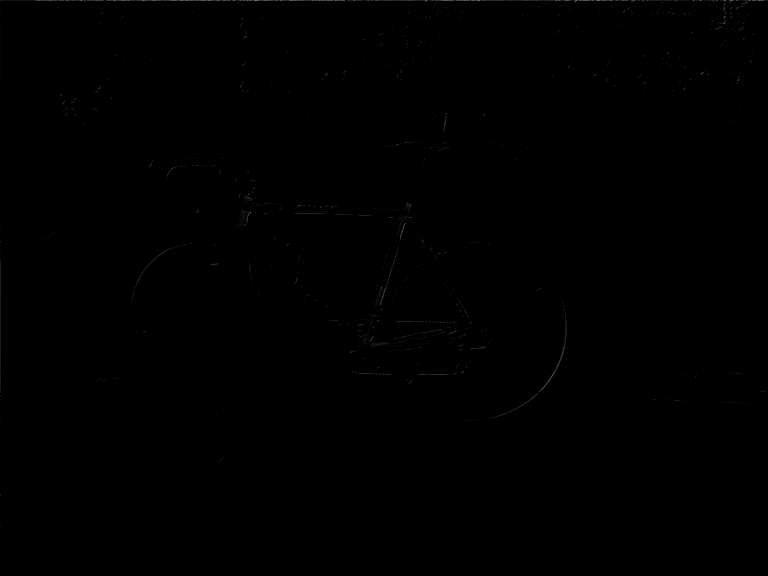

In [5]:
#作業: 接續搭建一個 4 個 3*3 的 filters
reset_graph()

model=Sequential()
model.add(Conv2D(4,
                 (3,3),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

print(model.summary())

image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0)
print(img.shape)
imshow(img[...,0])
imshow(img[...,1])
imshow(img[...,2])
imshow(img[...,3])